In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img.png")
img2 = cv2.imread("img2.png")
img3 = cv2.imread("img3.png")
img4 = cv2.imread("img4.png")
img5 = cv2.imread("img5.png")

# **辻ちゃんは、最近も炎上し続けているのか？**

***

## **仮説検証の背景**
辻ちゃんといえば、たびたび炎上している「炎上芸人」のイメージが勝手にありました。ネットで検索してみると、過去には「バーミアンでラーメンと冷やし中華を両方注文して炎上」、「イチゴに練乳をかけて炎上」、「猛暑の中、子供をプールで遊ばせ炎上」など、なにかと難癖を付けられ、炎上していたとのこと。しかし、調べていくと「炎上歴が10年を超え、最近では辻ちゃんを称賛する声が多くなってきた」との記事（下記※参照）を見つけました。そこで、最近も辻ちゃんは炎上し続けているのかを検証することにしました。

※参考記事　2020年6月10日投稿

https://dot.asahi.com/dot/2020060800016.html

# **仮説１「youtubeトレンド動画において、今も、辻ちゃんは炎上し続けている」**

***


## **検証手法** 


1. 元データのソース
    
  - kaggleより、youtubeにおける日次の国内トレンド動画(急上昇動画ともいう)のcsvファイルを入手。詳細は、ファイル「データサイエンス課題1（元データ）」のシート「元データ」をご覧ください。データ取得日は2021年1月15日。
  
    ※ソースデータのURLは下記。
   
    https://www.kaggle.com/rsrishav/youtube-trending-video-dataset

  - youtubeのトレンド動画とは？

    - ユーザ毎にカスタマイズできず、国ごとにすべてのユーザーに対して同じトレンド動画のリストが表示される。

    - トレンド動画は、視聴回数、視聴回数の伸びの速さ、視聴地域、動画の新しさ等を加味し、youtubeが選定している。単純に視聴回数が多い＝トレンドではない。 
    
      ※以下、URLご参照

          https://support.google.com/youtube/answer/7239739?hl=ja

<br>

2. 元データの前提条件
  - データの期間は、2020年8月12日〜2021年1月14日。ただし、4日間の欠損があり、合計日数は152日間。
  
    因みに、欠損している日は、2020年10月28日、2020年11月22日、2020年12月6日、2020年12月30日。

  - データには、動画30,397本分の情報有り。
    
    元データでは、トレンド入りした動画が1日200本分蓄積されている。但し、2020年9月12日は197本分のみの蓄積なので、合計の動画本数は30,397本（=200本/日×151日　＋　197本/日×1日）。
    
    また、同一動画が、数日間に渡ってトレンド入りした場合、同一動画が複数回カウントされる為、30,397本のデータには、動画の重複あり。

  - 動画情報には、投稿日、トレンド入りした日、再生回数、Like数、Dislike数、動画カテゴリ等の情報が含まれる。

  - 辻ちゃんは、「辻ちゃんネル」というyoutubeチャンネルを開設しており、48回トレンド入り。


<br>


3. 元データの加工

  - 動画の重複を削除
  
    動画の重複がある場合、同一動画の情報で、トレンド入りした日が一番新しいデータのみのを残した。その結果、重複のない動画5,170本に関する情報が得られた。

  - また、5,170本の動画の内、ジャニーズ公式チャンネル等309本は、Like、Dislikeが非公開なので、それらの動画は無視した。
  
  - 故に、今回の分析で用いた動画本数は、動画の重複がなく、Like、Dislikeができる動画4861本（=5,170本 − 309本）。

  - 4,861本の動画の内、「辻ちゃんネル」の動画は、8本あり。


<br>


4. 手法
  - スプレッドシートを用いて分析。詳細は、ファイル「データサイエンス課題1（分析用）」のシート「データ」、シート「（仮説1）グラフ等分析」をご覧ください。

  - 「response = Like数　＋　Dislike数」　、　「Bad率(%) ＝ Dislike / response × 100)」と定義し、各動画のBad率を比較した。

  - 再生回数に対するDislike数の割合を使用することも考えたが、再生回数は、同一ユーザーがひとつの動画を複数回見るとその分視聴回数がカウントされる、また動画にあまり興味がない人がクリックてしまった場合（最後まで動画見ない場合）もカウントされる為、使用しなかった。
  
  - 今回の分析では、ユーザーの重複がなく（Like or Dislikeは、どちらか一度しか押せない） 、かつ動画に興味がある人の意見（最後まで動画を見た可能性が高い？）が反映されているであろう、response数（Like数　＋　Dislike数）を使用した。

## **結果**

1. **結論**

  **「直近のyoutubeトレンド動画（全カテゴリ）から、もう辻ちゃんは炎上していない」**

<br>

2. **分析詳細**

  2-1. Bad率を降順に並び変えると、「辻ちゃんネル」の動画は、4861本中、1092位〜2730位。「炎上する」＝「悪い方向での異常事態」と考え、上位5%程度を「炎上した」と認めると、辻ちゃんの動画は、上位22.5%~56.2%であり、「炎上していない」と、言える。

    　※「辻ちゃんネル」動画の順位

      - 　1092位
    
        「【2020年11月】コストコでめっちゃ欲しかったもの買えたから大満足！【コストコ購入品】」　
    
        Bad率5.38%　

      - 　1114位　　
    
        「【ミス連発】久々の購入品紹介【300円】」 
    
        Bad率5.30%

      - 　1161位　　
    
        「【購入品】年末マジックってことで、、、またまたジェラピケ買っちゃいました！！！」 
    
        Bad率5.15%

      - 　1279位　　
    
        「【ネタバレ注意！！！】2021年の福袋開封！！！！！【GRL】【Afternoon Tea LIVING】【gelato pique】」 
    
        Bad率4.74%

      - 　1365位　　
    
        「【発売初日に！】ユニクロでスヌーピーコレクションGETしてきた！」 
    
        Bad率4.53%

      - 　2048位　　
    
        「【当時の衣装アリ】【暗記用】ミニモニ。のロックンロール県庁所在地～おぼえちゃいなシリーズ～を本人たちが踊ってみた/with高橋愛」 
    
        Bad率3.23%

      - 　2454位　　
    
        「【コラボ】ごっちんとプッチモニのぴったりしたいX'mas!を踊ってみた【後藤真希ちゃん】【サンタコス】」 
    
        Bad率2.73%

      - 　2730位　　
    
        「【勢いで】衣装を着たのでミニモニ。のCRAZY ABOUT YOUを踊ってみた」 
    
        Bad率2.41%

  2-2. 統計量の算出
    
    - 全データのBad率に関する統計量
      
        平均値　＝　4.3%

        中央値　＝　2.6%

        標準偏差　＝　6.6%
        
        <br>
      - 「辻ちゃんネル」の各動画の偏差値を算出すると、各動画の偏差値は、47.11~51.62程度。偏差値、52程度なので、辻ちゃんの動画は、「炎上していない」と、言える。

        - 「【2020年11月】コストコでめっちゃ欲しかったもの買えたから大満足！【コストコ購入品】」　
    
          偏差値51.62、Bad率5.38%　

        - 「【ミス連発】久々の購入品紹介【300円】」 
    
          偏差値51.50、Bad率5.30%

        - 「【購入品】年末マジックってことで、、、またまたジェラピケ買っちゃいました！！！」 
    
          偏差値51.27、Bad率5.15%
        - 「【ネタバレ注意！！！】2021年の福袋開封！！！！！【GRL】【Afternoon Tea LIVING】【gelato pique】」 
    
          偏差値50.65、Bad率4.74%

        - 「【発売初日に！】ユニクロでスヌーピーコレクションGETしてきた！」 
    
          偏差値50.33、Bad率4.53%
        - 「【当時の衣装アリ】【暗記用】ミニモニ。のロックンロール県庁所在地～おぼえちゃいなシリーズ～を本人たちが踊ってみた/with高橋愛」 
    
          偏差値48.37、Bad率3.23%

        - 「【コラボ】ごっちんとプッチモニのぴったりしたいX'mas!を踊ってみた【後藤真希ちゃん】【サンタコス】」 

          偏差値47.61、Bad率2.73%

        - 「【勢いで】衣装を着たのでミニモニ。のCRAZY ABOUT YOUを踊ってみた」 
    
          偏差値47.11、Bad率2.41%
<br>

    - 　モヤモヤ点
    
    偏差値を出した上で、偏差値と％の対応表（　https://komoriss.com/standard-score/　）をみたのですが、調べていくと、標本集団が、正規分布だと、「偏差値40〜60が全体の約68%をカバーする」というように、この対応表が使える様です。しかし、このデータは歪度＝6.09、尖度=−5242.9となり、またヒストグラム（図1）を見ても、元データは、正規分布に従うとは、考えにくく、対応表は意味の無いものかと。     
    因みに、図1のようなヒストグラムは、ベキ分布と呼びとのこと。
    http://yunavi.la.coocan.jp/powerlaw.html
  
  2-3. 参考として、Bad率の上位5本は下記の通り。アンジャッシュ渡部さんの炎上は、知っていましたが、「さんこいちチャンネル」と「門りょうチャンネル」は、知りませんでした。「さんこいちチャンネル」は3人組のyoutuberで、今後の動画投稿終了を発表した際、3人のテンションに温度差があり炎上、「門りょうチャンネル」では、元キャバ嬢の門りょう、GACKT、ROLANDで作ったアパレルブランド「G&R」がパクリ疑惑で炎上したとのことです。このクラスは、誰が見ても「炎上した」と言えますね。
  
    ※Bad率　TOP5
    
    1位 　さんこいちチャンネル　「いま僕が伝えたいこと。」
    
      Bad率90.05%　

    2位 　門りょうチャンネル　「G&Rの件につきまして」　
      
      Bad率87.01%　

    3位 　 さんこいちチャンネル　「私が今思うこと。」　
    
      Bad率83.47%　

    4位 　 ANNnewsCH　「アンジャッシュ渡部さん「軽率な行動で迷惑を」」　
    
      Bad率81.52%　

    5位 　 TBS NEWS　「アンジャッシュ渡部建さん会見　冒頭部分「軽率な行動により大変不快な思いをさせてしまったことを深くお詫び」」　
    
      Bad率79.74%　

<br>

3. **考察**
  - 辻ちゃんネルでは、料理動画等の若い夫婦に役立ちそうな動画が多々あり、炎上する要素があまり見当たらない（めっちゃいい嫁さんだと思います）。

  - 過去の炎上が、印象に残っているだけで、もう炎上していないのか？そもそも、過去の炎上も、本当に炎上したというよりネタの感覚が強かったのか？

  - チャンネルのカテゴリを見てみると、「エンターテイメント」、「ニュースと政治」のカテゴリに属するチャンネルの動画が、Bad率上位に多い。芸能人の動画を「ニュースと政治」カテゴリの動画合わせて検証するのは、違うのかも。

  - 「辻ちゃんネル」は、「ブログ」カテゴリに所属しており、「ブログ」カテゴリ内で、比較するとどうか？

図1


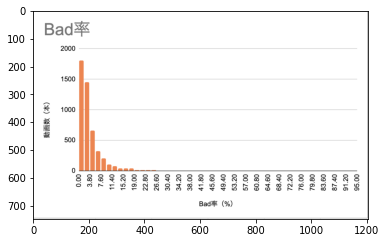

In [2]:
print("図1")
plt.imshow(img)

# **仮説２「youtubeトレンド動画での、ブログカテゴリにおいて、今も、辻ちゃんは炎上し続けている」**

***

## **検証手法** 


1. データのソース
    
 - 仮説１で加工したデータを利用。

<br>

2. データの加工

  - カテゴリを「ブログ」に絞って分析。

  - カテゴリ「ブログ」では、250のチャンネルがあり、動画の本数は719本。
  
  - 「辻ちゃんネル」の動画は、8本あり。

<br>

3. 手法
  - スプレッドシートを用いて分析。詳細は、ファイル「データサイエンス課題1（分析用）」のシート「データ」、シート「（仮説2）グラフ等分析」をご覧ください。

  - 仮説1と同様にBad率を用いて、比較を行った。

## **結果**

1. **結論**

  **「直近のyoutubeトレンド動画（ブログカテゴリ）でも、もう辻ちゃんは炎上していない」**

<br>

2. **分析詳細**

  2-1. Bad率を降順に並び変えると、「辻ちゃんネル」の動画は、719本中、161位〜410位。仮説1と同様に上位5%程度を「炎上した」と認めると、辻ちゃんの動画は、上位22.4%~57.0%であり、「炎上していない」と、言える。

    　※「辻ちゃんネル」動画の順位

      - 　161位
    
        「【2020年11月】コストコでめっちゃ欲しかったもの買えたから大満足！【コストコ購入品】」　
    
        Bad率5.38%　

      - 　168位　　
    
        「【ミス連発】久々の購入品紹介【300円】」 
    
        Bad率5.30%

      - 　175位　　
    
        「【購入品】年末マジックってことで、、、またまたジェラピケ買っちゃいました！！！」 
    
        Bad率5.15%

      - 　191位　　
    
        「【ネタバレ注意！！！】2021年の福袋開封！！！！！【GRL】【Afternoon Tea LIVING】【gelato pique】」 
    
        Bad率4.74%

      - 　204位　　
    
        「【発売初日に！】ユニクロでスヌーピーコレクションGETしてきた！」 
    
        Bad率4.53%

      - 　312位　　
    
        「【当時の衣装アリ】【暗記用】ミニモニ。のロックンロール県庁所在地～おぼえちゃいなシリーズ～を本人たちが踊ってみた/with高橋愛」 
    
        Bad率3.23%

      - 　377位　　
    
        「【コラボ】ごっちんとプッチモニのぴったりしたいX'mas!を踊ってみた【後藤真希ちゃん】【サンタコス】」 
    
        Bad率2.73%

      - 　410位　　
    
        「【勢いで】衣装を着たのでミニモニ。のCRAZY ABOUT YOUを踊ってみた」 
    
        Bad率2.41%

  2-2. 統計量の算出
  - ブログ」カテゴリでのBad率に関する統計量
  
    平均値　＝　4.4%

    中央値　＝　2.8%

    標準偏差　＝　6.2%

  - 「ブログ」カテゴリにおいて、ヒストグラム(図2)を作成すると、こちらのデータもベキ分布となっています。因みに、歪度は7.2、尖度は77.3。

  2-3. 参考として、「ブログ」カテゴリでのBad率上位5%の動画35本（719 × 5%）を見てみると、元キャバ嬢の「門りょうチャンネル」、東海ナンバーワンキャバ嬢の「エンリケ空間チャンネル」が、各3本の動画を炎上させており、キャバ嬢系の動画は、炎上しやすい傾向にあるのかもしれません(図3ご参照)。
  
<br>

3. **考察**
  - 「ブログ」カテゴリで見ても、「辻ちゃんネル」は、炎上していなかった。

  - そもそもトレンド動画とはどのように決まっているのか、ブラックボックス化されてわからない。

  - 「辻ちゃんネル」の動画のみのデータを抽出し、時系列で比較した方が、時系列で辻ちゃんだけを見て、最近も炎上しているのかどうか、気になる。

  - また、キャバ嬢系の動画は炎上しやすいのか気になる。

図2


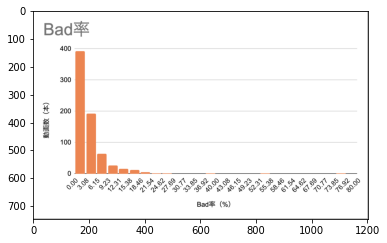

In [3]:
print("図2")
plt.imshow(img2)

図3


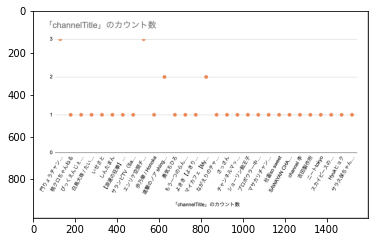

In [4]:
print("図3")
plt.imshow(img3)

# **仮説3「辻ちゃんネルにおいて、辻ちゃんは、今も炎上し続けている」**

***

## **検証手法** 


1. 元データのソース
    
  - youtubeAPIを利用して、「辻ちゃんネル」にアップロードされている全動画の情報をCSVファイルで取得。詳細は、ファイル「データサイエンス課題1（辻ちゃんネル）」のシート「元データ」をご覧ください。データ取得日は2021年1月18日。

2. 元データの前提条件
  - 動画の期間は、辻ちゃんが、チャンネルを開設した2019年5月17日〜2021年1月17日。

  - 元データには、「辻ちゃんネル」にアップロードされた全193本の動画の情報あり。

  - 動画情報には、再生回数、Like数、Dislike数、投稿日の情報が含まれる。

<br>


3.  手法
  - スプレッドシートを用いて分析。詳細は、ファイル「データサイエンス課題1（辻ちゃん）」のシート「（仮説3）グラフ等分析」をご覧ください。

  - 仮説1、2と同様に「response = Like数　＋　Dislike数」　、　「Bad率(%) ＝ Dislike / response × 100)」と定義し、各動画のBad率を比較した。


## **結果**

1. **結論**

  **「辻ちゃんネルにおいて、もう辻ちゃんは炎上していない」**

<br>

2. **分析詳細**

  2-1. Bad率を時系列に並び変えると、2019年はBad率10%を超える動画が、多々あったが、2020年に以降、Bad率10%以上は、「【GRWM2】とある休日の出発準備」の一本のみで、もう辻ちゃんは炎上していないと言える(図4参照)。

  因みに、Bad率TOP5は、下記の通り。TOP5にASMR系の動画が2本ランクイン。他にもASMR系の動画が1本（Bad率13.78% 第12位）あり、ASMR系の動画は、あまり受けがよくないのかもしれません。
  
    　※「辻ちゃんネル」での、Bad率TOP5

      - 　1位
    
        「【ASMR】野菜スティック編」　
    
        Bad率32.14%　

      - 　2位　　
    
        「辻希美YouTubeデビューします！」 
    
        Bad率26.81%

      - 　3位　　
    
        「【ASMR】コンビニスナック編」 
    
        Bad率17.26%

      - 　4位　　
    
        「ドレッサーをDIYしてみた」 
    
        Bad率16.84%

      - 　5位　　
    
        「【辻ちゃんのリアルマザーズバッグの中身紹介】」 
    
        Bad率14.97%

     
  2-2. 統計量の算出
  - 「辻ちゃんネル」でのBad率に関する統計量
  
    平均値　＝　6.0%

    中央値　＝　4.9%

    標準偏差　＝　3.9%


  2-3. 視聴回数を時系列で見てみると、top動画は730万回再生で、193本の動画の平均視聴回数は、76万再生と、人気youtuberであることがわかります（図5参照）。
  
<br>

3. **考察**
  - 「辻ちゃんネル」の全動画のBad率を時系列でみると、Bad率は減少傾向に。

  - 辻ちゃんのチャンネルは、子育て世代が多そう。ASMR系の動画は、その層には、不愉快なのか？

  - 他のASMR系動画は、どうなのか気になる。

図4


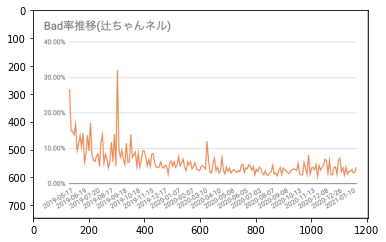

In [5]:
print("図4")
plt.imshow(img4)

図5


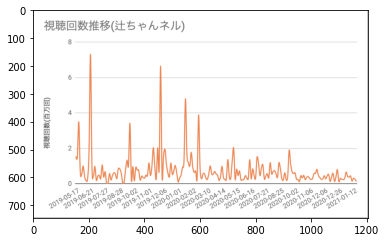

In [6]:
print("図5")
plt.imshow(img5)